# İstatistik

## Örnek Teorisi


In [73]:
import numpy as np
import pandas as pd

In [122]:
populasyon=np.random.randint(0,80,10000)
populasyon.mean()

39.5931

In [120]:
#Orneklem Çekimi
np.random.seed(15)
orneklem=np.random.choice(a=populasyon,size=100)
orneklem.mean()

42.06

In [130]:
#Örneklem Dağılımı
np.random.seed(10)
orneklem1 = np.random.choice(a = populasyon, size = 100)
orneklem2 = np.random.choice(a = populasyon, size = 100)
orneklem3 = np.random.choice(a = populasyon, size = 100)
orneklem4 = np.random.choice(a = populasyon, size = 100)
orneklem5 = np.random.choice(a = populasyon, size = 100)
orneklem6 = np.random.choice(a = populasyon, size = 100)
orneklem7 = np.random.choice(a = populasyon, size = 100)
orneklem8 = np.random.choice(a = populasyon, size = 100)
orneklem9 = np.random.choice(a = populasyon, size = 100)
orneklem10 = np.random.choice(a = populasyon, size = 100)

In [128]:
(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean() 
+ orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean() )  / 10

38.104

## Betimsel İstatistikler

### Kovaryans:İki değişken arasındaki ilişkinin değişkenlik ölçüsü
### Korelasyon: İki değişken arasındaki ilişkinin anlamlı olup olmamasını ve şiddetini temsil eder

In [133]:
import seaborn as sns
tips=sns.load_dataset("tips")
df=tips.copy()

In [135]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [149]:
!pip install researchpy

In [153]:
import researchpy as rp

In [158]:
rp.summary_cont(df[["total_bill","tip"]])

C:\Users\pc\anaconda3\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'total_bill' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
C:\Users\pc\anaconda3\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'tip' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728


In [162]:
rp.summary_cat(df[["sex","smoker"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11


In [164]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [166]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


### Uygulama:Fiyat Stratejisi

In [5]:
import numpy as np

In [7]:
prices=np.random.randint(10,110,1000)

In [17]:
prices.mean()

59.678

In [19]:
import statsmodels.stats.api as sms

In [25]:
sms.DescrStatsW(prices).tconfint_mean()    #%95 doğruluk ile fiyat bu aralıktadır.

(57.864877177055455, 61.49112282294454)

## Olasılığa ve Dağılımlara Giriş

In [29]:
#### Rassal Değişken: Değerlerini bir deneyin sonuçlarından alan değişkendir

## Bernoulli Dağılımı

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$


${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

In [37]:
from scipy.stats import bernoulli

#### Yazı Tura Örneği

In [52]:
p=0.7  #Tura Gelme Olasılığı

In [54]:
result=bernoulli(p)

In [58]:
result.pmf(k=0)  

0.30000000000000004

## Binom Dağılımı

### Uygulama: Reklam Harcaması Optimizasyonu

##### Problem:
##### Çeşitli mecralara reklam veriliyor, reklamların tıklanma ve geri dönüşüml
##### oranları optimize edilmeye çalışılıyor. Buna yönelik olarak belirli bir
##### mecrada çeşitli senaryolara göre reklama tıklama olasılıkları
##### hesaplanmak isteniliyor.

##### Detaylar:
##### Bir mecrada reklam verilecek
##### • Dağılım ve reklama tıklama olasılığı biliniyor (0.01)
##### • Soru: Reklamı 100 kişi gördüğünde 1,5 10 tıklanması olasılığı nedir?

In [186]:
from scipy.stats import binom

In [216]:
p=0.01
n=100
rv=binom(n,p)
print("1 kişinin görmesi olasılığı: "+ str(rv.pmf(1)))
print("5 kişinin görmesi olasılığı: "+ str(rv.pmf(5)))
print("10 kişinin görmesi olasılığı: "+ str(rv.pmf(10)))

1 kişinin görmesi olasılığı: 0.36972963764972666
5 kişinin görmesi olasılığı: 0.002897787123761478
10 kişinin görmesi olasılığı: 7.006035693977194e-08


## Poisson Dağılımı

### Belirli bir zaman aralığında belirli bir alanda nadiren
### rastlanan olayların olasılıklarını hesaplamak için kullanılır.

### Uygulama:Hatalı ilan giriş olasılığı hesaplama

In [22]:
lambda_=0.1#Ortalama hata sayısı

In [8]:
from scipy.stats import poisson

In [18]:
RV=poisson(mu=lambda_)
RV.pmf(k=0)#Hiç hata olmaması olasılığı


0.00015080623633932676

In [20]:
RV.pmf(k=3)#3 hata olması olasılığı

0.00015080623633932676

## Normal Dağılım

### Normal dağıldığı bilinen sürekli rassal değişkenler
### için olasılık hesaplaması için kullanılır.

### Uygulama:Ürün Satış Olasılık Hesaplama

#### Problem:
#### Bir yatırım/toplantı öncesinde gelecek ay ile ilgili satışların
#### belirli değerlerde gerçekleşmesi olasılıkları belirlenmek isteniyor.
#### Ortalama Satış:80k      Standart Sapma:5k

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  ortalama ya da dağılımın beklenen değeri

* ${\displaystyle \sigma }$  standart sapma

* ${\displaystyle \sigma ^{2}}$ varyans

In [35]:
from scipy.stats import norm

In [58]:
#90k dan fazla satış yapılması ihtimali
1-norm.cdf(90,80,5) #cdf:Kümülatif Dağılım Fonksiyonu
                    #norm.cdf(istediğimiz değer,ortalama,standart sapma)

0.9918024640754038

In [60]:
#68k dan az satış olması ihtimali

In [56]:
norm.cdf(68,80,5)

0.008197535924596131

In [ ]:
#90k ile 68k arasında olması ihtimali

In [62]:
1-norm.cdf(90,80,5)-norm.cdf(68,80,5)

0.014552596023583077

## Hipotez Testleri

#### Hipotez testi, bir örneklemden elde edilen verilerle bir iddianın (hipotezin) doğruluğunu istatistiksel olarak değerlendiren bir yöntemdir.

### Tek Örneklem T Testi

#### Popülasyon ortalaması ile varsayımsal bir değer arasında
#### istatistiksel olarak anlamlı bir farklılık olup olmadığını test
#### etmek için kullanılan parametrik bir testtir.

### Uygulama:Web Sitesinde Geçirilen Sürenin Testi

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

In [11]:
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [13]:
import scipy.stats as stats

In [20]:
stats.describe(olcumler)#Ortalamanın Gerçekten 154 mü yoksa şans eseri mi 154 geldiğini
                        #hipotez kurarak doğrulamaya çalışacağız

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [ ]:
#Varsayımlar
#Normallik Varsayımı

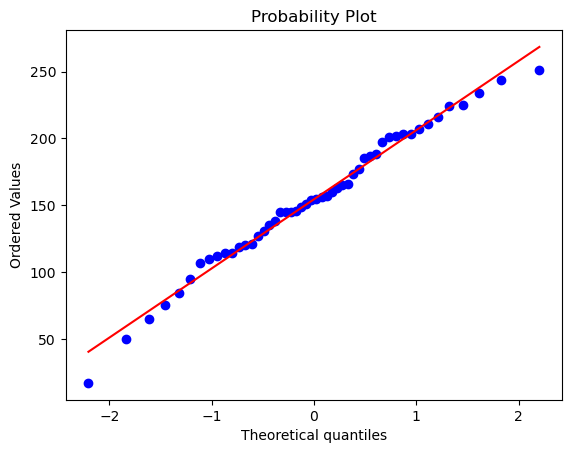

In [23]:
#qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

## Shapiro-Wilks Testi

H0: Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. yoktur

H1: ... fark vardır

In [15]:
from scipy.stats import shapiro
import pandas as pd

In [39]:
shapiro(olcumler)#p-value değeri 0.5 den küçük olmadığı için
                 #H0 reddedilemez
                 #Yani Normal Dağılım varsayımı sağlanıyor

ShapiroResult(statistic=0.9853103897061022, pvalue=0.7848671719373956)

In [41]:
#Hipotez Testinin Uygulanması

#### H0: Web sitemizde geçirilen ortalama süre 170'tir
#### H1: .. değildir

In [14]:
stats.ttest_1samp(olcumler,popmean=170)#p-value değerimiz 0.05den küçük olduğu için
                                       #H0 hipotezi reddedilir
                                       #Yani geçirilen ortalama süre 170 değildir

TtestResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446, df=49)

## Nonparametrik Tek Örneklem Testi

#### Nonparametrik tek örneklem testi, bir örneklemin belirli bir medyandan veya dağılımdan anlamlı şekilde farklı olup olmadığını test etmek için kullanılır.
#### Parametrik testlerin aksine, verilerin normal dağılıma uymasını gerektirmez ve özellikle küçük örneklemler veya dağılımı bilinmeyen veriler için tercih edilir.

In [10]:
from statsmodels.stats.descriptivestats import sign_test

In [12]:
sign_test(olcumler,170)#Sonuç doğru çıkmadı çünkü ölçümler normal dağılıyordu

(-7.0, 0.06490864707227217)

## Tek Örneklem Oran Testi

### Uygulama:Dönüşüm Oran Testi

#### Problem:
#### Bir yazılım ile bir mecrada reklam verilmiş ve bu reklama ilişkin yazılım tarafından 0.125 dönüşüm oranı elde
#### edildiği ifade edilmiş. Fakat bu durum kontrol edilmek isteniyor. Çünkü bu yüksek bir oran ve gelirler
#### incelendiğinde örtüşmüyor.
#### Detaylar:
#### 500 kişi dış mecrada reklamlara tıklamış, 40 tanesi sitemize gelip alişveriş yapmış.
#### Örnek üzerinden elde edilen dönüşüm oranı: 40/500 0108

In [ ]:
H0=0.125
H1!=125

In [19]:
from statsmodels.stats.proportion import proportions_ztest

In [23]:
count=40
nobs=500
value=0.125

In [27]:
proportions_ztest(count,nobs,value)#H0 hipotezi reddedilmiştir

(-3.7090151628513017, 0.0002080669689845979)

## Bağımsız İki Örneklem T Testi (AB Testi)

#### İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

### Uygulama:ML Modelinin Başarı Testi (AB Testi)

#### • Problem:
#### Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile
#### eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı test edilmek
#### isteniyor.
#### Detaylar:
#### Model geliştirilmiş ve web sitesine entegre edilmiş.
#### Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun.
#### A grubu eski B grubu yeni sistem.
#### Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

In [ ]:
#VERI TIPI I

In [17]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [20]:
#VERI TIPI II:Fonksiyon İçin Gereken 

In [23]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


C:\Users\pc\AppData\Local\Temp\ipykernel_9488\1949935531.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'A' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  GRUP_A[:] = "A"
C:\Users\pc\AppData\Local\Temp\ipykernel_9488\1949935531.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'B' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  GRUP_B[:] = "B"


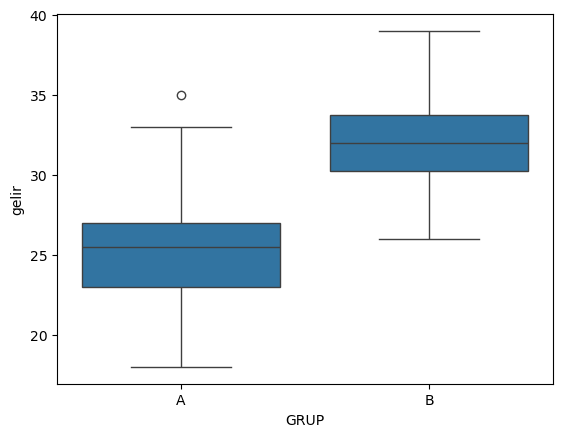

In [26]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

## Varsayım Kontrolü

In [30]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [32]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [34]:
#Normallik varsayım testi

In [38]:
shapiro(A_B['A'])#p-value değeri 0.05den yüksek olduğu için buna normal
                 #dağılımlı diyebiliriz

ShapiroResult(statistic=0.97892437099949, pvalue=0.7962848069993307)

In [40]:
shapiro(A_B['B'])#p-value değeri 0.05den yüksek olduğu için buna normal
                 #dağılımlı diyebiliriz

ShapiroResult(statistic=0.9561261367393356, pvalue=0.2458439374473953)

In [42]:
#Varyans homojenliği varsayımı

In [46]:
stats.levene(A_B["A"],A_B["B"])#Varyanslar homojendir diyebiliriz

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

## Hipotez Testi

In [ ]:
H0:Farklılık Yoktur
H1:Farklılık Vardır

In [53]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)#p-value değeri 0.05den
                                                     #küçük olduğu için 
                                                     #H0 hipotezi reddedilir
                                                     #anlamlı bir farklılık
                                                     #vardır diyebiliriz

TtestResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09, df=58.0)

## Nonparametrik Bağımsız İki Örneklem Testi

#### Normallik ve Varyans homojenliği sağlanmadığı durumlarda kullanılır

In [59]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

## Bağımlı İki Örneklem T Testi

In [ ]:
H0=Değişim Yoktur
H1=Değişim Vardır

### Uygulama:Şirket İçi Eğitim Performansı Değerlendirmesi

#### Problem:
#### Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı
#### ölçülmek isteniyor.
#### Detaylar:
#### Bir departman bir konuda eğitim talep ediyor
#### Gerekli/gereksiz değerlendirmeleri neticesinde eğitim alınıyor
#### Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor
#### Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor

In [91]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [93]:
oncesi.head()

,0
0,123
1,119
2,119
3,116
4,123


In [96]:
 np.arange(len(oncesi))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [99]:
#1.Tip Veri:İki Değeri Farklı Sütunlarla Birleştirme(Varsayım Kontrolleri İçin)

In [117]:
Birinci=pd.concat([oncesi,sonrasi],axis=1)
Birinci.columns=["ONCESİ","SONRASİ"]
Birinci.head()

,ONCESİ,SONRASİ
0,123,118
1,119,127
2,119,122
3,116,132
4,123,129


In [ ]:
#2.Tip Veri:Öncesi Ve Sonrası Alt Alta Tek Sütunda Birleştirilir

In [170]:
#TAGLARIN OLUSTURULMASI
GRUP_ONCESİ=np.arange(len(oncesi))
GRUP_ONCESİ=pd.DataFrame(GRUP_ONCESİ)
GRUP_ONCESİ[:]="ONCESİ"

###############################################################################################################
GRUP_SONRASİ=np.arange(len(sonrasi))
GRUP_SONRASİ=pd.DataFrame(GRUP_SONRASİ)
GRUP_SONRASİ[:]="SONRASİ"
GRUP_SONRASİ.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_9488\2586429570.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ONCESİ' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  GRUP_ONCESİ[:]="ONCESİ"
C:\Users\pc\AppData\Local\Temp\ipykernel_9488\2586429570.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'SONRASİ' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  GRUP_SONRASİ[:]="SONRASİ"


,0
0,SONRASİ
1,SONRASİ
2,SONRASİ
3,SONRASİ
4,SONRASİ


In [174]:
#TAGLARIN VE DEĞERLERİN BİRLEŞTİRİLMESİ
A=pd.concat([oncesi,GRUP_ONCESİ],axis=1)

##################################################################################################
B=pd.concat([sonrasi,GRUP_SONRASİ],axis=1)
B.head()

,0,0
0,118,SONRASİ
1,127,SONRASİ
2,122,SONRASİ
3,132,SONRASİ
4,129,SONRASİ


In [229]:
#2.TİP VERİNİN OLUŞTURULMASI VE İSİMLENDİRİLMESİ
A_B=pd.concat([A,B])
A_B.columns=["Performans","ONCESİ_SONRASİ"]
A_B.tail()

,Performans,ONCESİ_SONRASİ
35,129,SONRASİ
36,133,SONRASİ
37,120,SONRASİ
38,127,SONRASİ
39,123,SONRASİ


<Axes: xlabel='ONCESİ_SONRASİ', ylabel='Performans'>

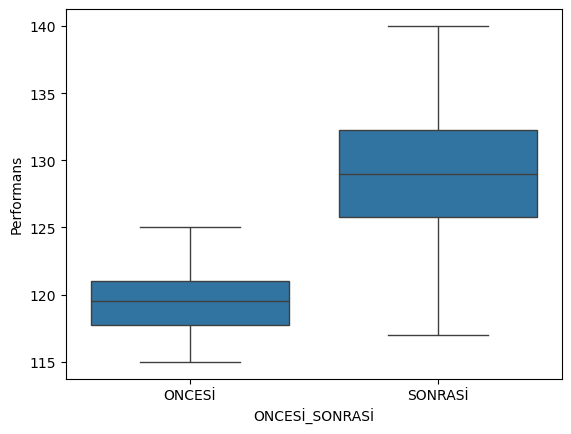

In [199]:
import seaborn as sns
sns.boxplot(x="ONCESİ_SONRASİ",y="Performans",data=A_B)

### Varsayım Kontrolü

In [ ]:
#Normallik Kontrolü

In [204]:
from scipy.stats import shapiro

In [215]:
shapiro(Birinci.ONCESİ)#Normal Dağılıyor

ShapiroResult(statistic=0.9543651286601341, pvalue=0.10722012473424775)

In [219]:
shapiro(Birinci.SONRASİ)#Normal Dağılıyor

ShapiroResult(statistic=0.9780089132335147, pvalue=0.6159508885102487)

In [223]:
#Varyans Homojenliği Kontrolü

In [227]:
import scipy.stats as stats
stats.levene(Birinci.ONCESİ,Birinci.SONRASİ)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

### Hipotez Testi

In [248]:
stats.ttest_rel(Birinci.ONCESİ, Birinci.SONRASİ)#p-value değeri 0.05den küçük olduğu için
                                                #H0 hipotezi olan değişim yoktur hipotezi 
                                                #reddedilmiştir. Eğitim işe yaramıştır

TtestResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11, df=39)

### Non-Parametrik Bağımlı İki Örneklem Testi

In [262]:
stats.wilcoxon(Birinci.ONCESİ, Birinci.SONRASİ)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

## İki Örneklem Oran Testi

#### Bir Satın Al Butonu Eklenecek Yeşil Renkli Mi Olsun Kırmızı Renkli Mi?
#### Kırmızı(1000 Görüntülenme, 300 Tıklanma)        Yeşil(1100 Görüntülenme 250 Tıklama)

In [272]:
from statsmodels.stats.proportion import proportions_ztest

In [274]:
basari_sayisi=np.array([300,250])
gözlem_sayisi=np.array([1000,1100])

In [276]:
proportions_ztest(count=basari_sayisi,nobs=gözlem_sayisi)#p-value değeri 0.05den küçük olduğu için
                                                         #oranlar eşit değildir
                                                         #aralarında anlamlı bir farklılık vardır

(3.7857863233209255, 0.0001532232957772221)

## Varyans Analizi

#### Üç ya da daha fazla grup ortalaması arasında istatistiksel
#### olarak anlamlı farklılık olup olmadığı öğrenilmek
#### istenildiğinde kullanılır

### Hipotezleri
#### H0: Grupların ortalamaları arasında fark yoktur.

#### H1: En az bir grup diğerlerinden farklıdır.

### Varsayımları
#### • Gözlemlerin birbirinden bağımsız olması (grupların)
#### • Normal dağılım
#### • Varyans homojenliği

### Uygulama:Anasayfa İçerik Stratejisi Belirlemek
#### • Problem:
#### Anasayfalda geçirilen süre artırılmak isteniyor
#### Detaylar:
#### Bir web sitesi için başarı kriterleri: ortalama ziyaret süresil hemen çıkış oranı vb
#### Uzun zaman geçiren kullanıcılarn reklamlara daha fazla tıkladığı ve markaya olan
#### bağlılıklarının arttığı biliniyor.
#### Buna yönelik olarak benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak
#### oluşturulan test gruplarına gösteriliyor.
#### • A: Doğal Şekilde, B: Yönlendirici, C: İlgi Çekici

In [ ]:
H0: M1 = M2 = M3 (grup ortalamalari arasinda ist anl. farklilik yoktur) 

H1: Fark vardir.

In [309]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]
ABC=pd.concat(dfs,axis=1)
ABC.columns=["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


### Varsayım Kontrolü

In [324]:
shapiro(ABC['GRUP_A'])

ShapiroResult(statistic=0.9697430293916081, pvalue=0.5321675250468361)

In [316]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789855288537495, pvalue=0.7979814669020528)

In [320]:
shapiro(ABC["GRUP_C"])#0.05den büyük olduğu için H0 varsayımı reddedilemez bu yüzden
                      #Normal Dağılmışlardır Diyebiliriz

ShapiroResult(statistic=0.9579198548620552, pvalue=0.27381521754487215)

In [328]:
stats.levene(ABC['GRUP_A'],ABC["GRUP_B"],ABC["GRUP_C"])#Varyanslarımız Homojen Dağılmıştır

LeveneResult(statistic=1.0267403645055275, pvalue=0.3624711011741707)

### Hipotez Testi

In [335]:
from scipy.stats import f_oneway

In [337]:
f_oneway(ABC['GRUP_A'],ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.307905074681148e-19)

In [347]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


### Nonparametrik Hipotez Testi

In [352]:
from scipy.stats import kruskal

In [354]:
kruskal(ABC['GRUP_A'],ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

## Korelasyon Analizi

#### Değişkenler arasındaki ilişkil bu ilişkinin yönü ve şiddeti
#### ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.

In [ ]:
H0=Değerler Arasında Anlamlı Bir İlişki Yoktur
H1=Değerler Arasında Anlamlı Bir İlişki Vardır

### Varsayımları
#### • İki değişken içinde normallik varsayımı.
#### • Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı
#### • Varsayım sağlanmıyorsa Spearman Korelasyon Katsayısı

### Uygulama:Bahşiş İle Hesap Arasındaki İlişki

Bahşiş veri seti:

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [16]:
import seaborn as sns
import numpy as np
import pandas as pd

In [24]:
tips=sns.load_dataset("tips")
df=tips.copy()

In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
df["total_bill"]=df["total_bill"]-df["tip"]

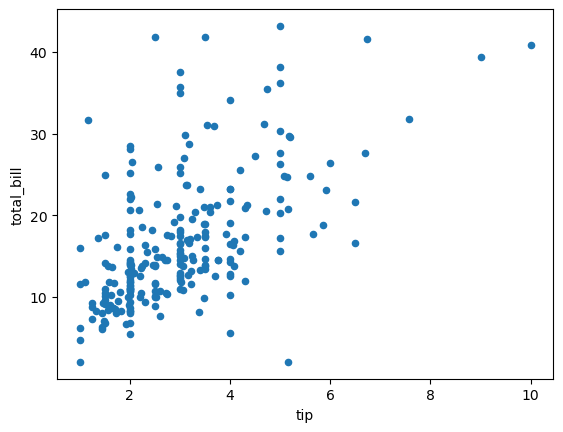

In [62]:
df.plot.scatter("tip","total_bill");

### Varsayım Kontrolü

In [65]:
from scipy.stats import shapiro

In [72]:
test_istatistigi, pvalue = shapiro(df["tip"])
print(pvalue)   #Değer 0.05den küçük olduğu için normal dağılım göstermemiştir

8.200360128656659e-12


In [74]:
test_istatistigi, pvalue = shapiro(df["total_bill"])
print(pvalue)   #Değer 0.05den küçük olduğu için normal dağılım göstermemiştir

1.1059404008058959e-10


### Hipotez Testi

#### Korelasyon Katsayısı

In [83]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [98]:
df["tip"].corr(df["total_bill"],method="spearman")#Normallik Varsayımı Sağlanmadığı İçin Bu Method Kullanılır
                                                  #Pozitif Yönlü Orta Şiddetli Bir İlişkileri Vardır Diyebiliriz

0.593691939408997

#### Korelasyon Anlamlılığı 

In [103]:
from scipy.stats import pearsonr

In [107]:
pearsonr(df["tip"],df["total_bill"])#p-value 0.05den küçük olduğu için Değerler arasında anlamlı bir ilişki yoktur
                                    #diyen H0 hipotezini reddediyoruz
                                    #aralarında anlamlı bir ilişki vardır diyebiliriz
                    

PearsonRResult(statistic=0.5766634471096381, pvalue=5.018290084948537e-23)

### Nonparametrik Hipotez Testi

In [125]:
from scipy import stats
stats.spearmanr(df["tip"],df["total_bill"])

SignificanceResult(statistic=0.593691939408997, pvalue=1.2452285137560276e-24)